In [1]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy

import pandas as pd
import seaborn as sns
sns.set()

import pickle

from collections import namedtuple
import copy

In [2]:
estate = pd.read_pickle("estate_no_ttf.pkl")
#remove constant columns, std = standard deviation which is 0 for columns containing the same value in all elements
estate = estate.drop(estate.std()[(estate.std() == 0)].index, axis=1) #outcomment for onehot and coulomb
estate.index = range(0, len(estate))

y = estate.HOMO #+ estate.E_opt #for LUMO energies
X = estate
#drop all the extra data columns from X - find with print(X.keys())
for key in ['name', 'E_opt', 'HOMO', 'smiles']:
    X = X.drop(key,axis=1)

X = X.values
y = y.values

In [4]:
my_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=my_seed)

In [5]:
#linear regression for training set
reg = LinearRegression().fit(X_train, y_train)
R2 = reg.score(X_train, y_train)

In [6]:
print('Coefficients: \n', reg.coef_)

Coefficients: 
 [-5.41491766e+00  1.16406961e-01  1.61195234e-02  1.08027617e-01
  4.89910704e-02  2.73370550e-02  1.89977146e-01 -1.76187387e-02
  6.34210331e-02  8.90726806e-02  4.95965495e-02  1.09422049e-01
 -6.02631421e-03  1.11594389e+01 -9.19542905e-03 -9.97277388e-03
 -1.19166948e-01  1.73107799e-01  2.94103446e-02 -4.36500714e-04
 -3.45432377e+01  1.27135321e-02  1.65008009e-01  5.59109562e-03]


In [7]:
#predict for testing set
y_pred = reg.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

In [8]:
#SAVE DATA
#save predicted HOMO energies for the test data
np.savetxt("estate_HOMO_predicted.csv",y_pred, delimiter=",")

#save calculated HOMO energies for the test data
np.savetxt("estate_HOMO_calculated.csv",y_test,delimiter=",")

In [9]:
print("RMSE is "+str(RMSE)+" and R2 for fit is "+str(R2))

RMSE is 0.05511491477320451 and R2 for fit is 0.9125989175369054


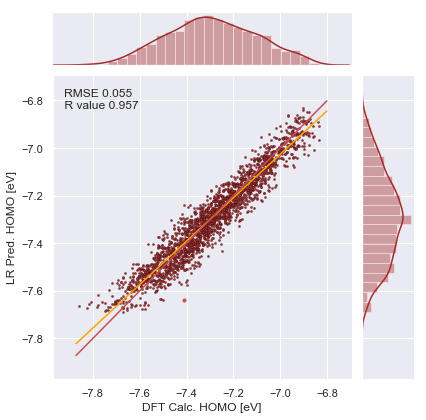

In [10]:
data = pd.DataFrame(columns=["DFT Calc. HOMO [eV]","LR Pred. HOMO [eV]"])
data["DFT Calc. HOMO [eV]"] =  y_test
data["LR Pred. HOMO [eV]"] =  y_pred

ax = sns.jointplot("DFT Calc. HOMO [eV]","LR Pred. HOMO [eV]",data,kind='scatter',s=5,edgecolor="black",linewidth=0.2,marginal_kws=dict(kde=True),color="brown")

slope,intercept,r_value,p_value,std_error = scipy.stats.linregress(y_test,y_pred)
ax.ax_joint.text(y.min()+.1,y.max(),"RMSE {:.3f} \n R value {:.3f}".format(np.sqrt(mean_squared_error(y_test, y_pred)),r_value),horizontalalignment='center',
     verticalalignment='center')

x = np.arange(y.min(),y.max(),0.01)
ax.ax_joint.plot(x,intercept+slope*x,color="orange")
ax.ax_joint.plot(x,x,'r-')

error = y_test - y_pred
plotted = True
for i,er in enumerate(error):
    if np.abs(er) > 0.2:
        ax.ax_joint.plot(y_test[i],y_pred[i],'ro',markersize=3)

ax.ax_joint.axis([y.min()-0.1, y.max()+0.1,y.min()-0.1, y.max()+0.1])

#save figure
ax.savefig("jointplot_estate_HOMO.pdf")